<ipython-input-10-f425219fa476>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


RMSE: 0.31


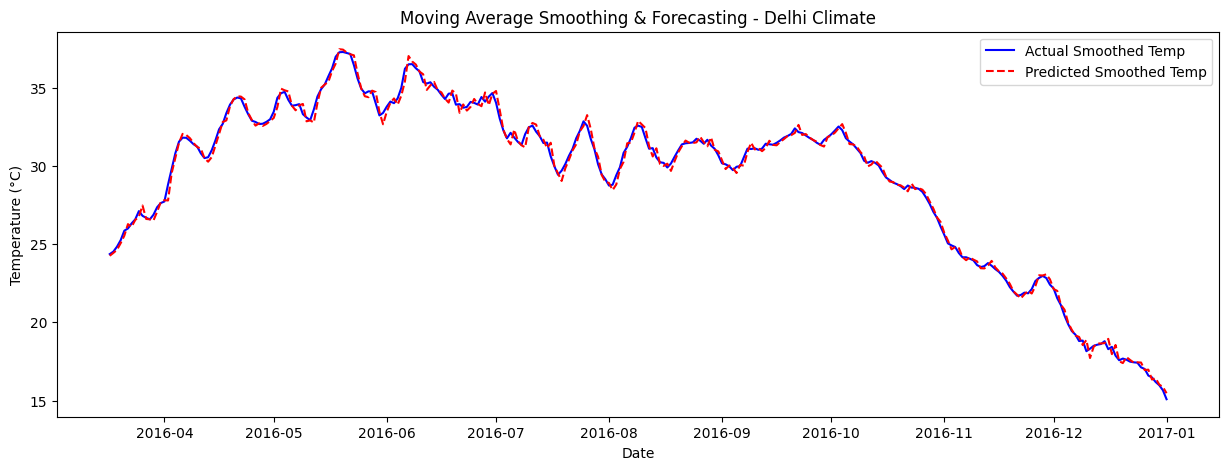

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 🔹 Enter your dataset path
dataset_path = "/content/DailyDelhiClimateTrain.csv"  # Replace with actual file path

# 🔹 Load the dataset
data = pd.read_csv(dataset_path, parse_dates=['date'], index_col='date')

# 🔹 Handle missing values (forward fill)
data.fillna(method='ffill', inplace=True)

# 🔹 Apply Moving Average Smoothing (window = 7 days)
data['meantemp_smooth'] = data['meantemp'].rolling(window=7).mean()

# 🔹 Drop NaN values created by rolling window
data.dropna(inplace=True)

# 🔹 Create lag features based on smoothed data
lag_days = 3  # Number of past days to consider

for i in range(1, lag_days + 1):
    data[f'meantemp_lag{i}'] = data['meantemp_smooth'].shift(i)

# 🔹 Drop rows with NaN values due to lagging
data.dropna(inplace=True)

# 🔹 Define features (X) and target (y)
X = data[[f'meantemp_lag{i}' for i in range(1, lag_days + 1)]]
y = data['meantemp_smooth']

# 🔹 Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 🔹 Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔹 Make predictions
y_pred = model.predict(X_test)

# 🔹 Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# 🔹 Plot actual vs predicted temperatures
plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label="Actual Smoothed Temp", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted Smoothed Temp", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Moving Average Smoothing & Forecasting - Delhi Climate")
plt.legend()
plt.show()
